# Trabajo práctico 1. Fraude en tarjetas

Una plataforma de ventas online nos contrata para que realicemos un modelo que nos
permita detectar un posible fraude dada cierta operación para ello contamos con un dataset
que contiene las siguientes columnas:

● Step: representa una unidad de tiempo donde 1 step equivale a 1 hora

● type: tipo de transacción en línea

● amount: el importe de la transacción

● nameOrig: cliente que inicia la transacción

● oldbalanceOrg: saldo antes de la transacción

● newbalanceOrig: saldo después de la transacción

● nameDest: destinatario de la transacción

● oldbalanceDest: saldo inicial del destinatario antes de la transacción

● newbalanceDest: el nuevo saldo del destinatario después de la transacción

● isFraud: transacción fraudulenta
Utilizando los modelos de clasificación vistos hasta el momento generar un notebook que
permita de ser posible resolver el problema que nos está planteando el cliente.

IMPORTANTE
Sabemos que por cada transacción aprobada el porcentaje de ganancia es de un
20%, y por cada fraude aprobado se pierde el 100% del dinero de la transacción.
Realizar un análisis y determinar un modelo que permita maximizar la ganancia de la empresa.

https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset


## 1. Obtención de datos

Para esta práctica vamos a usar el siguiente dataset

https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [21]:
# Cambiar a lo que corresponda
DATASET_PATH = "..\\data\\datos_tp1"


In [22]:
!dir {DATASET_PATH}

 El volumen de la unidad D es Datos
 El n�mero de serie del volumen es: 24D1-CEDE

 Directorio de d:\Users\juanp_schamun\Documents\GitRepositories\CEIA\AM1\aprendizaje_maquina_I\data\datos_tp1

11/03/2023  02:09 p.m.    <DIR>          .
11/03/2023  02:09 p.m.    <DIR>          ..
11/03/2023  12:56 p.m.       493,534,783 PS_20174392719_1491204439457_log.csv
               1 archivos    493,534,783 bytes
               2 dirs  323,563,937,792 bytes libres


## 2. Análisis exploratorio inicial

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [24]:
df = pd.read_csv(DATASET_PATH+"/PS_20174392719_1491204439457_log.csv")
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Obtener alguna información básica

In [25]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [27]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

## 3. Gráficos

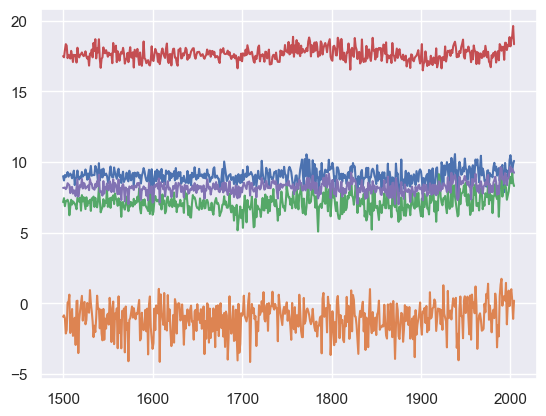

In [67]:
plt.plot(df['year'], df[['autumn','winter','spring','summer','annual']])

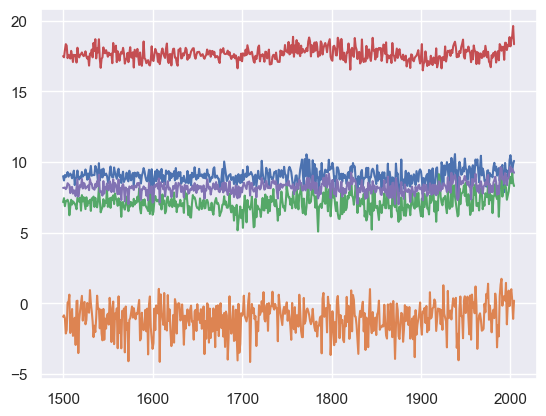

In [68]:
def plot_temperature_trends(df,filename,start_year=None,end_year=None):
    """Realiza un gráfico de tendencia y lo almacena en un archivo.

    :param df: Dataframe con valores de temperaturas anuales. 
               Debe contener las columnas 'year' y 'autumn','winter','spring','summer', 'annual'.               
    :type pd.Dataframe        
    :param filename: Nombre del archivo de salida
    :type string        
    :param start_year: Año inicial. Si se omite, es el primero de la serie.
    :type int, optional
    :param end_year: Año final. Si se omite, es el último de la serie.
    :type int, optional        
    """
    plt.plot(df['year'], df[['autumn','winter','spring','summer','annual']])
    
plot_temperature_trends(df,filename="tendencia_temperatura_completo.png",start_year=None,end_year=None)

Del gráfico anterior, podemos realizar las siguientes observaciones:

1. Los inviernos siempre son más fríos que la primavera, que a su vez son más frías que los otoños, que a su vez son más frías que el otoño.
2. La temperatura promedio varía más en invierno que en otras estaciones.
3. Las primaveras varían más desde alrededor del comienzo del siglo 19.

Lo que no podemos observar con claridad son tendencias. Podríamos responder, por ejemplo, ¿si está incrementándose la temperatura?
Los números sugieren que la temperatura está incrementándose porque las temperaturas en invierno, verano y promedio ocurren en los años recientes. Sin embargo, estos valors son sólo extremos que pueden o no estar correlacionados con un comportamiento general de la temperatura.

Para observar mejor este fenómeno, podemos utilizar [suavizado](http://en.wikipedia.org/wiki/Smoothing).

Hay diferentes algoritmos de suavizado. Aquí usaremos el [promedio móvil](http://en.wikipedia.org/wiki/Moving_average) en su forma más simple. 

Si la temperatura para una cierta estación en el año $y$ está dada por la variable $L_y$, entonces crearemos nuevas variables:

$$
L'_y := \frac{1}{2r+1} \sum_{k=y-r}^{y+r} L_k,
$$

Por ejemplo, $L'_y$ es el valor promedio entre las temperaturas del año $y-r$ hasta (e incluyendo) $y+r$, donde $r$ (el radio) es un parámetro dado. Cuanto mayor $r$, más mayor el grado de suavizado.

¿Cómo calcular el promedio móvil?

Comencemos por plantearlo para un elemento, el $i$-ésimo. Esto significa computar la suma $\sum_{k=i-r}^{i+r} L_k$ y dividirla por $2r+1$. Esto significa que debemos:

* obtener una parte de la serie: `L[i-r:i+r+1]` (el `+1` está aquí porque el límite izquierdo no se incluye como parte de la nueva lista),

* calcular la suma: $\sum_{k=i-r}^{i+r} L_k =$`sum(L[i-r:i+r+1])`,

* dividir por `2*r+1`: $\frac{1}{2r+1} \sum_{k=i-r}^{i+r} L_k =$ `sum(L[i-r:i+r+1]) / (2*r+1)`.

Pista: en python, se puede repetir el procedimiento anterior para todos los índices posibles `i` utilizando list comprehension.

In [ ]:
def smooth(L,r):
    """ Dada una serie, devuelver una nueva serie con el suavizado por promedio móvil para radio r.    
    :param L: Serie
    :type: pd.Series
    :param r: grado de suavizado.
    :type: int
    :return: Serie suavizada
    :rtype: pd.Series
    """
    # COMPLETAR
    new_series_values = [] # ...
    return pd.Series(new_series_values)

series = df.autumn

Visualización con distintos niveles de suavizado.

In [ ]:
smoothing_params = [2,4,32,64]
fig,axes=plt.subplots(len(smoothing_params)+1,1,figsize=(22,4*len(smoothing_params)))
axes[0].plot(df.year,series)
axes[0].set_title("Sin suavizado")

for i,r in enumerate(smoothing_params):
    axes[1+i].plot(df.year.iloc[r:-r],smooth(series,r),lw=4)
    axes[1+i].set_title("Con suavizado r={}".format(r))

In [ ]:
def plot_temperature_trends_smooth(df,filename,r=1,start_year=None,end_year=None):
    """Realiza un gráfico de tendencia y lo almacena en un archivo.

    :param df: Dataframe con valores de temperaturas anuales. 
               Debe contener las columnas 'year' y 'autumn','winter','spring','summer', 'annual'.               
    :type pd.Dataframe        
    :param filename: Nombre del archivo de salida
    :type string        
    :param start_year: Año inicial. Si se omite, es el primero de la serie.
    :type int, optional
    :param end_year: Año final. Si se omite, es el último de la serie.
    :type int, optional        
    """
    # COMPLETAR
    # ...
    
plot_temperature_trends_smooth(df,filename="tendencia_temperatura_suavizado.png",
                               r=17,start_year=None,end_year=None)

Opcional: es posible mejorar el gráfico anterior mostrando los valores con distinto suavizado con menor opacidad, como se muestra en la figura.

<center>
<img src="assets/tendencia_temperatura_suavizado2.png"/>
</center>

Opcional: Implementar la función plot_temperature_trends_smooth2 que realiza un gráfico similar al anterior para una lista de valores de suavizado, por ejemplo [ 0, 1, 3, 11, 17 ].
Pista: usar el atributo alpha para controlar la opacidad de los gráficos y label, cuidando de establecer en None todas las etiquetas excepto las de menor opacidad.

In [ ]:
def plot_temperature_trends_smooth2(df,filename,start_year=None,end_year=None):
    """Realiza un gráfico de tendencia y lo almacena en un archivo.

    :param df: Dataframe con valores de temperaturas anuales. 
               Debe contener las columnas 'year' y 'autumn','winter','spring','summer', 'annual'.               
    :type pd.Dataframe        
    :param filename: Nombre del archivo de salida
    :type string        
    :param start_year: Año inicial. Si se omite, es el primero de la serie.
    :type int, optional
    :param end_year: Año final. Si se omite, es el último de la serie.
    :type int, optional        
    """
    # COMPLETAR
    # ...
    
plot_temperature_trends_smooth2(df,filename="tendencia_temperatura_suavizado2.png", start_year=None,end_year=None)

## 4. Mapa de temperaturas

Hasta ahora hemos visto las temperaturas promedio, pero disponemos también de información de las temperaturas para cada punto del mapa.

Para esto trabajaremos con el archivos TT_Europe_1500_2002_New.GDX, que se describe en Readme_TT_1500_2002.txt.

Recuerden que estos archivos los pueden descargar de [aquí]((https://drive.google.com/drive/folders/1qBUspt_avXUNhtQ5CV0U2VNxQjnurwWh?usp=sharing)

In [ ]:
!ls {DATASET_PATH}

In [ ]:
!cat {DATASET_PATH}/Readme_TT_1500_2002.txt

Dado que tenemos datos geográficos de Europa para los últimos 500 años, una cosa que podemos hacer es mostrar un mapa de temperaturas para cualquier año


In [ ]:
!ls -lh {DATASET_PATH}/TT_Europe_1500_2002_New.GDX

Algunas observaciones:

- **Tamaño del archivo de entrada**: En este caso el archivo puede ser demasiado grande para procesar con Pandas, así que adoptaremos otra estrategia. Como sólo estamos interesados en los valores correspondientes a un año, escribiremos una función *get_temperatures()* que obtenga los valores para cada celda para una fecha dada.
- El formato de los datos es de una grilla que se obtuvo de aplicar una proyección (llamada [equirectangular](http://en.wikipedia.org/wiki/Equirectangular_projection)). Nota: el área cubierta es 25W-40E y 35N-70N, en lugar de 30N-70N, como dice el README.

In [ ]:
code2season = {
    13: "Invierno",
    14: "Primavera",
    15: "Verano",
    16: "Otoño"
}

# Vamos a crear un diccionario que debe devolver la inversa: 
# Vamos a crear esto de manera sencilla y eficiente usando un diccionario por compresión
# ¿Conocías esta forma? el uso de generadores en python pueden ayudar
# mucho en el desarrollo de funciones eficientes ;)

season2code = {nk:nv for (nv,nk) in code2season.items()} # COMPLETAR

print(code2season)
print(season2code)

In [ ]:
def get_temperatures(gdx_filename, year, season ):        
    global code2season, season2code
    # String para filtrar, construida como indica el README.
    year_season_filter = "{:04d}{:02d}".format(year, season2code[season])

    data = None
    with open(gdx_filename, mode="rt", encoding="utf8") as f:
        for line in f:
            # "yyyyss"
            if line[:6] == year_season_filter:
                data = [float(x) for x in line[6:].strip().split()]
                break
    return data

data = get_temperatures(DATASET_PATH+"/TT_Europe_1500_2002_New.GDX",year = 1700,season = "Otoño")
len(data)

Notar que hemos obtenido una lista de 9100 puntos, pero necesitamos una grilla. 
Convertiremos la lista a una array de 70x130 de Numpy.

In [ ]:
data = np.array(data).reshape((70, 130))
fig,axes = plt.subplots(1,1,figsize=(22,8))
axes.imshow(data, interpolation="bicubic", cmap='jet');
axes.grid(False)

El gráfico anterior tiene un problema. Los colores se asignan automáticamente, con el menor valor asignado a azul y los más altos a rojo (y el resto entre estos colores).

El README provisto indica que las temperaturas continentales están disponibles. Para el mar, se asigna el valor -999.99. 

El problema es que las temperaturas de interés (aproximadamente entre -25C y 40C) están comprimidas en el tope de escala. Una forma de evitar esto es normalizando los valores de interés.

In [ ]:
from matplotlib import colors
norm = colors.Normalize(
     vmin=data[data > -100.0].min(),
     vmax=data[data <100.0].max()
)

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(22,8))
axes.imshow(data, interpolation="bicubic", norm=norm, cmap='jet');
axes.grid(False)

El próximo paso es combinar esta imagen con una imagen de Europa.

In [ ]:
from matplotlib import image

def plot_temperatures(year, season):
    # Nota: no debería haber rutas hardcoded.
    data = get_temperatures(DATASET_PATH+"/TT_Europe_1500_2002_New.GDX",year = year,season = season)
    data = np.array(data).reshape((70, 130))
    
    europe_img = image.imread(DATASET_PATH+"/europe.png")
    
    norm = colors.Normalize(
         vmin=data[data > -100.0].min(),
         vmax=data[data <100.0].max()
    )
    
    fig,axes = plt.subplots(1,1,figsize=(20,8))
    axes.imshow(europe_img)
    im = axes.imshow(data,
         interpolation="bicubic",
         norm=norm,
         alpha=0.43,
         extent=(0,europe_img.shape[1],europe_img.shape[0],0),
         cmap='jet'
    )
    fig.suptitle("Temperaturas en Europa en {} de {}".format(season,year) )
    fig.colorbar(im)
    axes.grid(False)
    
    
plot_temperatures(1700, "Otoño")

Bonus: escribir una función que para un intervalo de años, grafique o anime las estaciones, por ejemplo:

<center>
<img src="assets/multiple_seasons.png"/>
</center>

## 5. Conclusiones

En este cuaderno se dieron los primeros pasos en el uso de herramientas para poder manipular archivos, trabajar con arrays y realizar visualizaciones.

En lo sucesivo se irán incorporando nuevas técnicas de análisis y procesamiento, con el objetivo de utilizarlas también en la preparación de datos para modelos de aprendizaje automático.

## Referencias

### Datos de temperaturas

Luterbacher, J., et al.  2006.  
European Seasonal Temperature Reconstructions.  
IGBP PAGES/World Data Center for Paleoclimatology  
Data Contribution Series # 2006-060.  
NOAA/NCDC Paleoclimatology Program, Boulder CO, USA.

### Grilla de temperatura absoluta del aire en superficie para Europa, años 1500-2002:

Luterbacher, J., Dietrich, D., Xoplaki, E., Grosjean, M., and Wanner, H., 2004:  
European seasonal and annual temperature variability, trends, and extremes since 1500,  
Science 303, 1499-1503 ([DOI:10.1126/science.1093877](http://doi.org/10.1126/science.1093877)).

Xoplaki, E., Luterbacher, J., Paeth, H., Dietrich, D., Steiner N., Grosjean, M., and Wanner, H., 2005:  
European spring and autumn temperature variability and change of extremes over the last half millennium,  
Geophys. Res. Lett., 32, L15713 ([DOI:10.1029/2005GL023424](http://doi.org/10.1029/2005GL023424)).

Nota: Este cuaderno fue adaptado de https://personalpages.manchester.ac.uk/staff/stefan.guettel/py/10a-data_analysis-2020.pdf
